In [59]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive/RDFIA/TME1")
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Compte rendu TME1 DJEGHRI_MAMOU.docx'	'SIFT course 2.pdf'
 data					 tools.py
 debug.log				 tp1-2.pdf
 __pycache__				'TP_1_2_SIFT_&_BoW_Sorbonne.ipynb'
'SIFT course 1.pdf'


In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
from tools import *
from os.path import join

data_path = "data"

# Partie 1 : SIFT

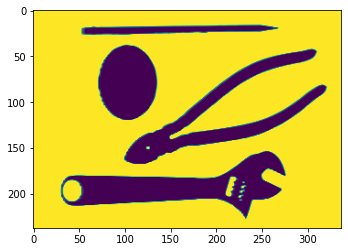

In [40]:
# example images
I = read_grayscale(join(data_path, 'tools.tiff'))
I2 = read_grayscale(join(data_path, 'Scene/CALsuburb/image_0205.jpg'))
plt.imshow(I)

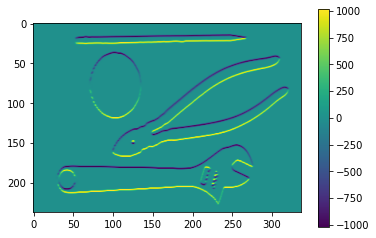

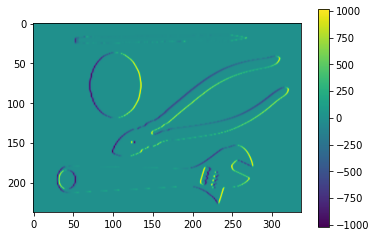

In [41]:
def compute_grad(I):

    ha=np.array([-1,0,1])
    hb=np.array([1,2,1])
    Ix=conv_separable(I,hb,ha)
    Iy=conv_separable(I,ha,hb)
    
    return Ix, Iy

# example d'affichage du résultat
Ix, Iy = compute_grad(I)
plt.imshow(Ix)
plt.colorbar()
plt.show()
plt.imshow(Iy)
plt.colorbar()
plt.show()

In [42]:
def compute_grad_mod_ori(I):
    Ix, Iy=compute_grad(I)
    Gn=np.sqrt(Ix**2+Iy**2)
    
    Go=compute_grad_ori(Ix, Iy, Gn)
    
    return Gn, Go

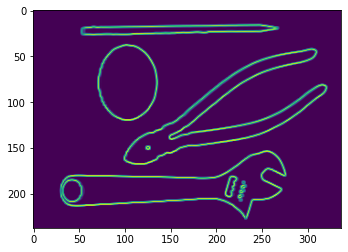

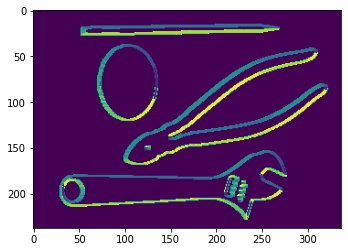

In [43]:
Gn, Go = compute_grad_mod_ori(I)
plt.imshow(Gn)
plt.show()
plt.imshow(Go)
plt.show()

In [44]:
def compute_histogram(g_n, g_o):
    """
    g_n and g_o are 4x4 matrices that contain the norm, and the discretized orientation.
    Warning: g_o can contain -1, those values should be discarded.
    """
    hist = np.zeros((8))
    for i in range(8):
        hist[i]=np.array(np.sum(np.where(g_o == i, g_n, 0)))
    return hist
  

<BarContainer object of 8 artists>

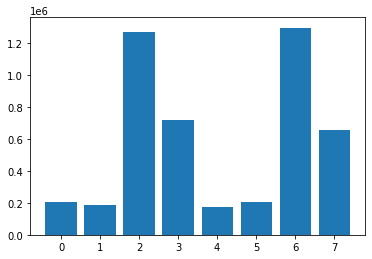

In [45]:
hist=compute_histogram(Gn, Go)
plt.bar(height=hist, x=range(8))

In [46]:
def compute_sift_region(Gn, Go, mask=None):
    t_min=.5
    t_max=.2
    with_l2 = True

    patch_size = 16
    sift = np.zeros((128)) 

    if mask is not None:
        Gn = Gn * mask
    
    idx = 0
    for k in range(0, patch_size, 4):
        for l in range(0, patch_size, 4):
            hist = compute_histogram(Gn[l:l+4,k:k+4], Go[l:l+4,k:k+4])            
            sift[idx:idx+8] = hist
            idx += 8

    norm = np.linalg.norm(sift, ord=2)
    # min thresholding on norm
    if norm <= t_min:
        return np.zeros((128))
    # l2-normalization
    if with_l2:
        sift = sift / norm
    # max thresholding on values
    sift[sift >= t_max] = t_max
    # l2-normalization
    if with_l2:
        norm = np.linalg.norm(sift, ord=2)
        sift = sift / norm
    return sift

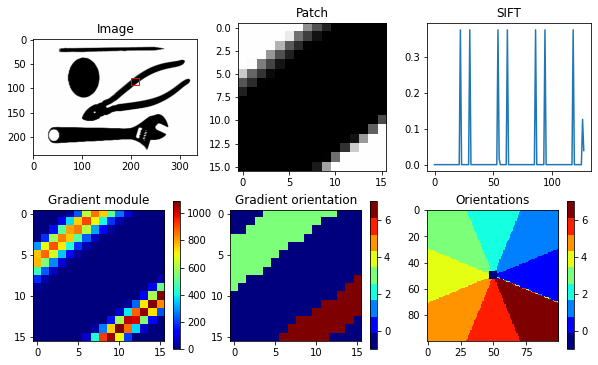

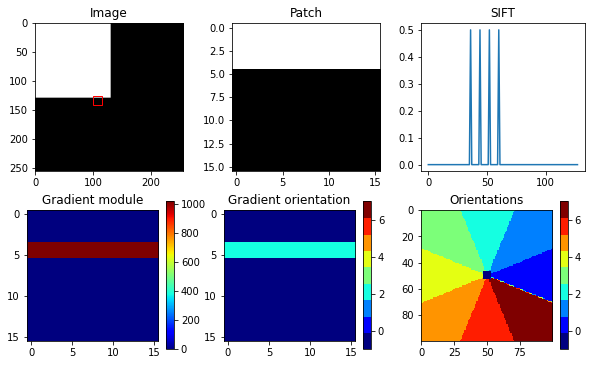

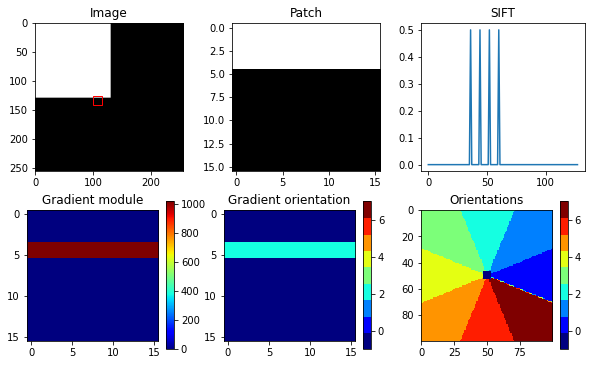

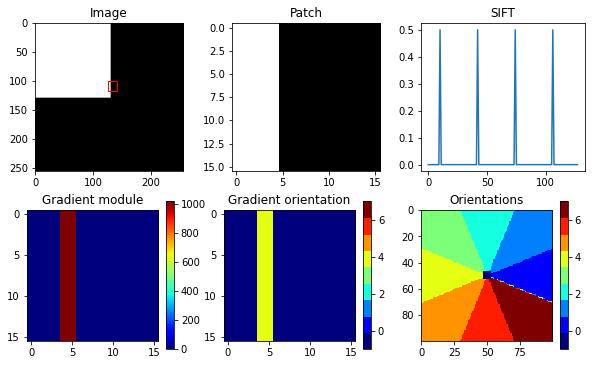

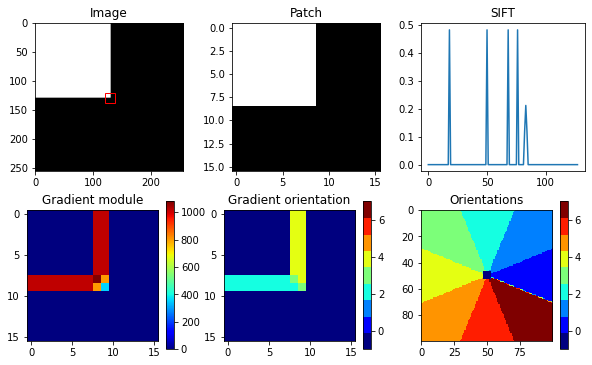

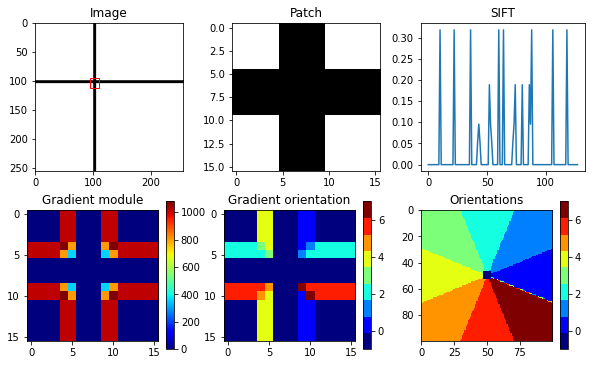

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.3181317 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3181317 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18864812, 0.09560369, 0.05344409,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.3181317 , 0.        , 0.        , 0.        , 0.3181317 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05344409, 0.09560369, 0.18864

In [47]:
# Example of viz of SIFTs
# set gausm to True to apply mask weighting of gradients
display_sift_region(I,           compute_grad_mod_ori, compute_sift_region, x=200, y=78, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=100, y=125, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=125, y=100, gausm=False)
display_sift_region(marche_im(), compute_grad_mod_ori, compute_sift_region, x=121, y=121, gausm=False)
display_sift_region(toy_im(),    compute_grad_mod_ori, compute_sift_region, x=95, y=95, gausm=False)

In [48]:
def compute_sift_image(I):
    x, y = dense_sampling(I)
    im = auto_padding(I)
    m = gaussian_mask()
    
    Gn, Go = compute_grad_mod_ori(I)


    sifts = np.zeros((len(x), len(y), 128))
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            gn_r=Gn[xi:xi+16, yj:yj+16]
            go_r=Go[xi:xi+16, yj:yj+16]
            sifts[i, j, :] = compute_sift_region(gn_r, go_r)

    return sifts

# Compute SIFT

Le calcul durera plusieurs minutes.

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
max_images_per_class = 10  # You can change this to None to compute the whole dataset (takes quite some time)

save_path = "/content/gdrive/My Drive/rdfia/"
dir_sc = os.path.join(data_path, 'Scene')
dir_sift = os.path.join(save_path, 'sift')


In [73]:
inames, ilabls, cnames = load_dataset(dir_sc, images_per_class=max_images_per_class)
sifts_list_by_image = compute_load_sift_dataset(dir_sc, dir_sift, inames, compute_sift_image)

Computing or loading SIFTs


# Partie 2 : Dictionnaire visuel

In [118]:
from sklearn.cluster import KMeans

path_vdict = os.path.join(save_path, 'kmeans', 'vdict.npy')
os.makedirs(os.path.join(save_path, 'kmeans'), exist_ok=True)

In [105]:
# Code here the `compute_visual_dict` function
def compute_visual_dict(sift, n_clusters=1000, n_init=1, verbose=1):
    # reorder data
    dim_sift = sift[0].shape[-1]
    sift = [s.reshape(-1, dim_sift) for s in sift]
    sift = np.concatenate(sift, axis=0)
    # remove zero vectors
    keep = ~np.all(sift==0, axis=1)
    sift = sift[keep]
    # randomly pick sift
    ids, _ = compute_split(sift.shape[0], pc=0.05)
    sift = sift[ids]

    # compute kmeans on `sift`, get cluster centers, add zeros vector, and return visual dict
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, verbose=verbose)
    kmeans.fit(sift)
    vdict = np.vstack((kmeans.cluster_centers_, np.zeros((1, dim_sift))))

    return vdict


In [106]:
# Run the visual dict computation (saved the first time)
vdict = compute_or_load_vdict(dir_sc, dir_sift, inames, compute_sift_image, path_vdict, compute_visual_dict)

Computing or loading visual dict
Computing or loading SIFTs
(7919, 128)
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 160925122.8412763
start iteration
done sorting
end inner loop
Iteration 1, inertia 158835547.19007626
start iteration
done sorting
end inner loop
Iteration 2, inertia 158345416.06152976
start iteration
done sorting
end inner loop
Iteration 3, inertia 158075931.5217221
start iteration
done sorting
end inner loop
Iteration 4, inertia 158010139.1649746
start iteration
done sorting
end inner loop
Iteration 5, inertia 157976033.39601645
start iteration
done sorting
end inner loop
Iteration 6, inertia 157955828.18568814
start iteration
done sorting
end inner loop
Iteration 7, inertia 157948299.9638925
start iteration
done sorting
end inner loop
Iteration 8, inertia 157940344.26876992
start iteration
done sorting
end inner loop
Iteration 9, inertia 157938002.06450608
start iteration
done sorting
end inner loop
Iteration 10, inertia 15

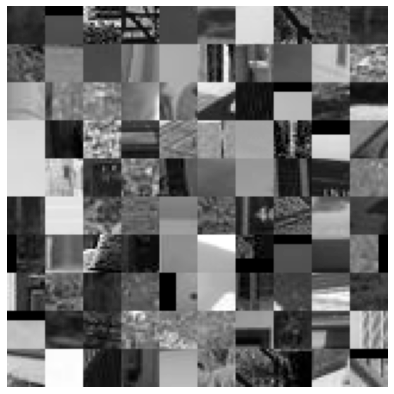

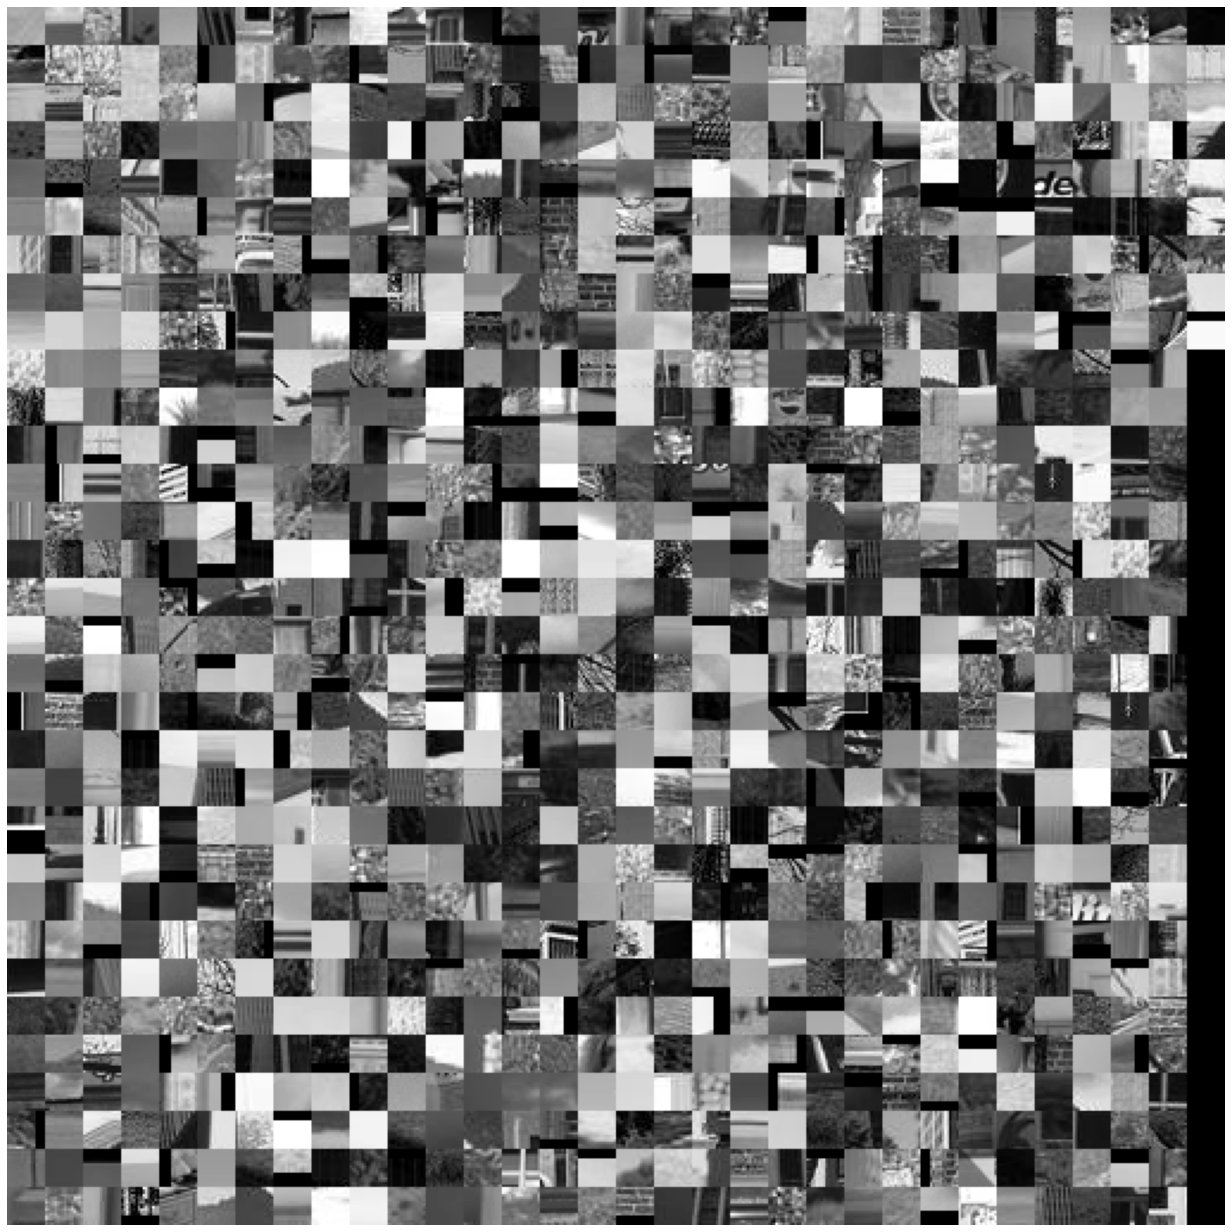

In [115]:
# Study of the dict

# choose random images
indexes = np.random.randint(0, len(inames), 30)
sifts = [sifts_list_by_image[i] for i in indexes]
chosen_inames = [inames[i] for i in indexes]

regions, sifts = get_regions_and_sifts(dir_sc, chosen_inames, sifts) # Compute SIFT and regions from 30 random images
display_images(regions[np.random.choice(len(regions), 100)]) # Show 100 random regions

# TODO visually analyze the dict through similar example regions
# Ideally, create `vdregions`, a numpy array of size 1001 x 16 x 16 where each of the 1001 elements is a
# "prototype" patch that is very close to the cluster center
from sklearn.metrics.pairwise import euclidean_distances
euc_distances = euclidean_distances(vdict, sifts)
close_centers = np.argmin(euc_distances, axis=1)
vdregions = regions[close_centers]
display_images(vdregions)

# Partie 3 : BoW

In [127]:
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    euc_distances = euclidean_distances(sifts, vdict)
    print(euc_distances.shape)
    center_clusters = np.argmin(euc_distances, axis=1)
    print(center_clusters.shape)
    for cc in center_clusters:
      feats[cc] +=1

    print( feats.shape)
    # L2 normalisation
    norm = np.linalg.norm(feats, ord=2)
    feats = feats / norm

    return feats

(1176, 1001)
(1176,)
(1001,)


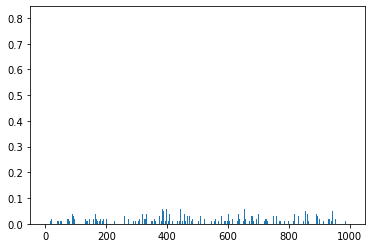

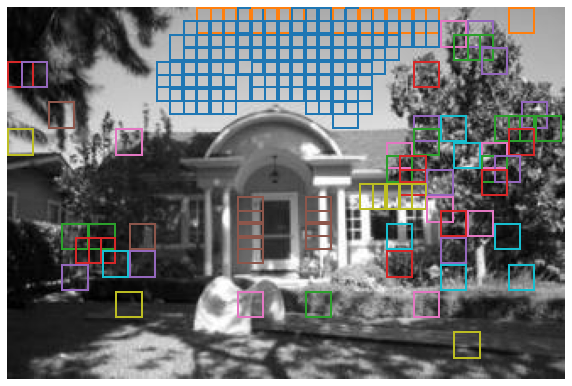

(9, 16, 16)


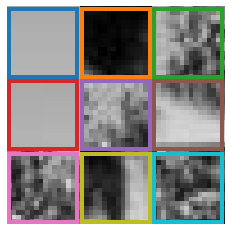

In [128]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here

#### Using predict of kmeans

In [129]:
# using predict of kmeans
# TODO Compute BoW for an image
# indication: scipy.spatial.distance_matrix
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance_matrix

def compute_feats_2(vdict, image_sifts):
    """
    vdict: (num_clusters, 128): visual dictionnary containing all clusters.
    image_sifts: (H, W, 128) all sift features from the given image
    """
    # flatten sifts
    sifts = image_sifts.reshape(-1, 128)  # (N, 128)
    feats = np.zeros(vdict.shape[0])

    kmeans= KMeans()
    kmeans.cluster_centers_ = vdict
    preds = [kmeans.predict(sift.reshape(1,-1)) for sift in sifts]

    # pooling
    z = np.zeros(len(vdict))
    for pred in preds:
      z[pred]+= 1

    # L2 normalisation
    norm = np.linalg.norm(z, ord=2)
    z = z / norm
    feats = z
    return feats

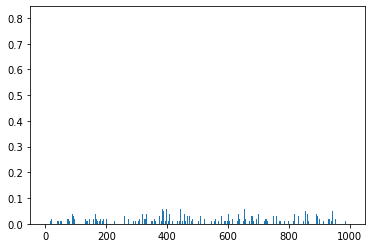

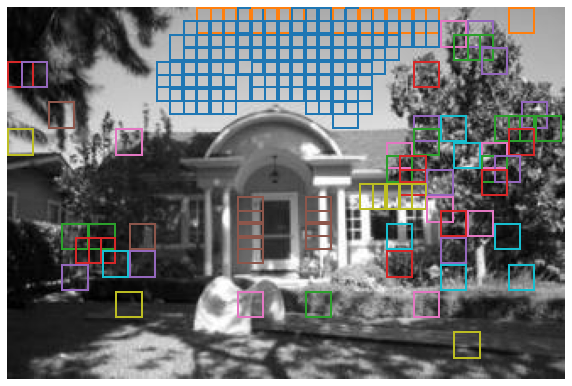

(9, 16, 16)


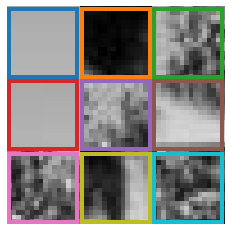

In [130]:
# Visualize your BoW on an image

iname = inames[0]
ipath = os.path.join(dir_sc, iname)
im = read_grayscale(ipath)
sift = compute_sift_image(im)
sift = (sift * 255).astype('uint8')
regions = compute_regions(im)
feats = compute_feats_2(vdict, sift)

display_vdregions_image(im, vdict, sift, feats, vdregions=None) # if you have vdregions, add it as input here